
MNIST NN  https://www.kaggle.com/jcodogno/simple-nn-using-stochastic-gradient-descent

In [13]:
#import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import sys

from sklearn import datasets
#from sklearn.model_selection import train_test_split

seed = 7
np.random.seed(seed)

In [19]:
df = pd.read_csv("data/train.csv")
train = df.as_matrix()

In [31]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
train_y = train[:,0].astype('int8')
train_x = train[:,1:].astype('float32')

In [48]:
df = pd.read_csv("data/test.csv")
test = df.as_matrix().astype('float32')
print("shape test images: (%d, %d)" % train_x.shape)

shape test images: (42000, 784)


visualize the data

In [49]:
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image, shape)
    plt.imshow(img, cmap=cmp, interpolation='none')
    plt.title(label)

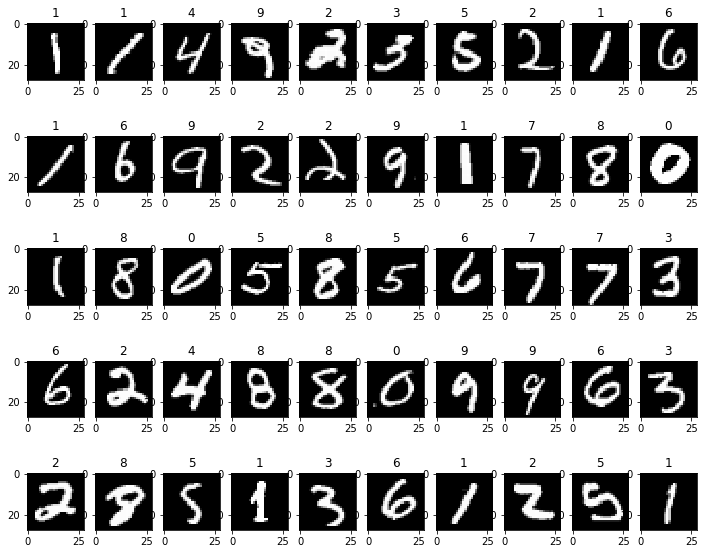

In [37]:
%matplotlib inline
plt.figure(figsize=(12,10))

y, x = 5, 10
for i in range(0, (y*x)):
    plt.subplot(y,x,i+1)
    ni = np.random.randint(0, train_x.shape[0],1)[0]
    show_image(train_x[ni], (28,28),train_y[ni], cmp="gray")
plt.show()

We normalize the data to avoid precision errors.  Values are between 0-255, so we will divide each value by 255.  We want a distribution with mean zero and small variance in general

In [50]:
train_x /= 255

print ("max: %.2f" % np.max(train_x))

max: 1.00


In [51]:
train_y = pd.get_dummies(train_y).as_matrix()


In [61]:
VALID_SIZE = round(train_x.shape[0]*0.1)

index_data = np.arange(train_x.shape[0])
np.random.shuffle(index_data)

#x_train is 10% of training data (images)
#x_valid is 90%
x_train = train_x[index_data[VALID_SIZE:]]
x_valid = train_x[index_data[:VALID_SIZE]]

#d_train, d_valid are the labels
d_train = train_y[index_data[VALID_SIZE:]]
d_valid = train_y[index_data[:VALID_SIZE]]

train_x = None
train_y = None

x_train.shape

/Users/momori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/momori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/momori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/momori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(37800, 784)

In [62]:
def initializationWeights():
    ##Initialization of the Weights and the Biases with the random gaussian function with mean zeron, and variance between 1/sqtr(num_inputs_layer)
    
    ninputs = 784
    wl1 = 500
    wl2 = 300
    nclass = 10
    
    mean = 0
    
    #layer1
    variance = 1.0/np.sqrt(ninputs)
    w1 = np.random.normal(mean, variance, [ninputs,wl1])
    b1 = np.random.normal(mean, variance, [1,wl1])
    dw1 = np.zeros([ninputs,wl1])
    db1 = np.zeros([1,wl1])
    
    #Layer2
    variance = 1.0/np.sqrt(wl1)
    w2 = np.random.normal(mean, variance, [wl1,wl2])
    b2 = np.random.normal(mean, variance, [1,wl2])
    dw2 = np.zeros([wl1,wl2])
    db2 = np.zeros([1,wl2])

    #Layer3
    variance = 1.0/np.sqrt(wl2)
    w3 = np.random.normal(mean, variance, [wl2,nclass])
    b3 = np.random.normal(mean, variance, [1,nclass])
    dw3 = np.zeros([wl2,nclass])
    db3 = np.zeros([1,nclass])
    
    
    return [w1,w2,w3,b1,b2,b3,dw1,dw2,dw3,db1,db2,db3]